# Import library and sorce codes

## Import library

In [22]:
import pandas as pd
from pymatgen import core
from sklearn.preprocessing import StandardScaler
import torch
import numpy as np
import matplotlib.pyplot as plt


## Import sorce codes

In [23]:
import src.preprocess_func as preprocess
import src.training_model as training
import src.plotting as plotting
import src.Variable_generator as vg

# Preprocess data

In [24]:
# filename = 'https://drive.google.com/uc?id=1-2Ia30pDDiRgof0FFinN4EQ-1BN24qld&export=download'
filename = 'srf\SM_FT_dataset.csv'
df = pd.read_csv(filename,index_col=0)

comps = [core.Composition(x) for x in df['Composition']]
dset = preprocess.data_generator(comps)
Training_sequences = dset.real_data # X_train
Elements_sequences = dset.elements #input elements sequence

properties_values = df.iloc[:,1:].values.astype('float32') # Y_train
scaler = StandardScaler() # Standard_scaler
properties_values_scaled = scaler.fit_transform(properties_values) # Scaled Y_train


# Training models

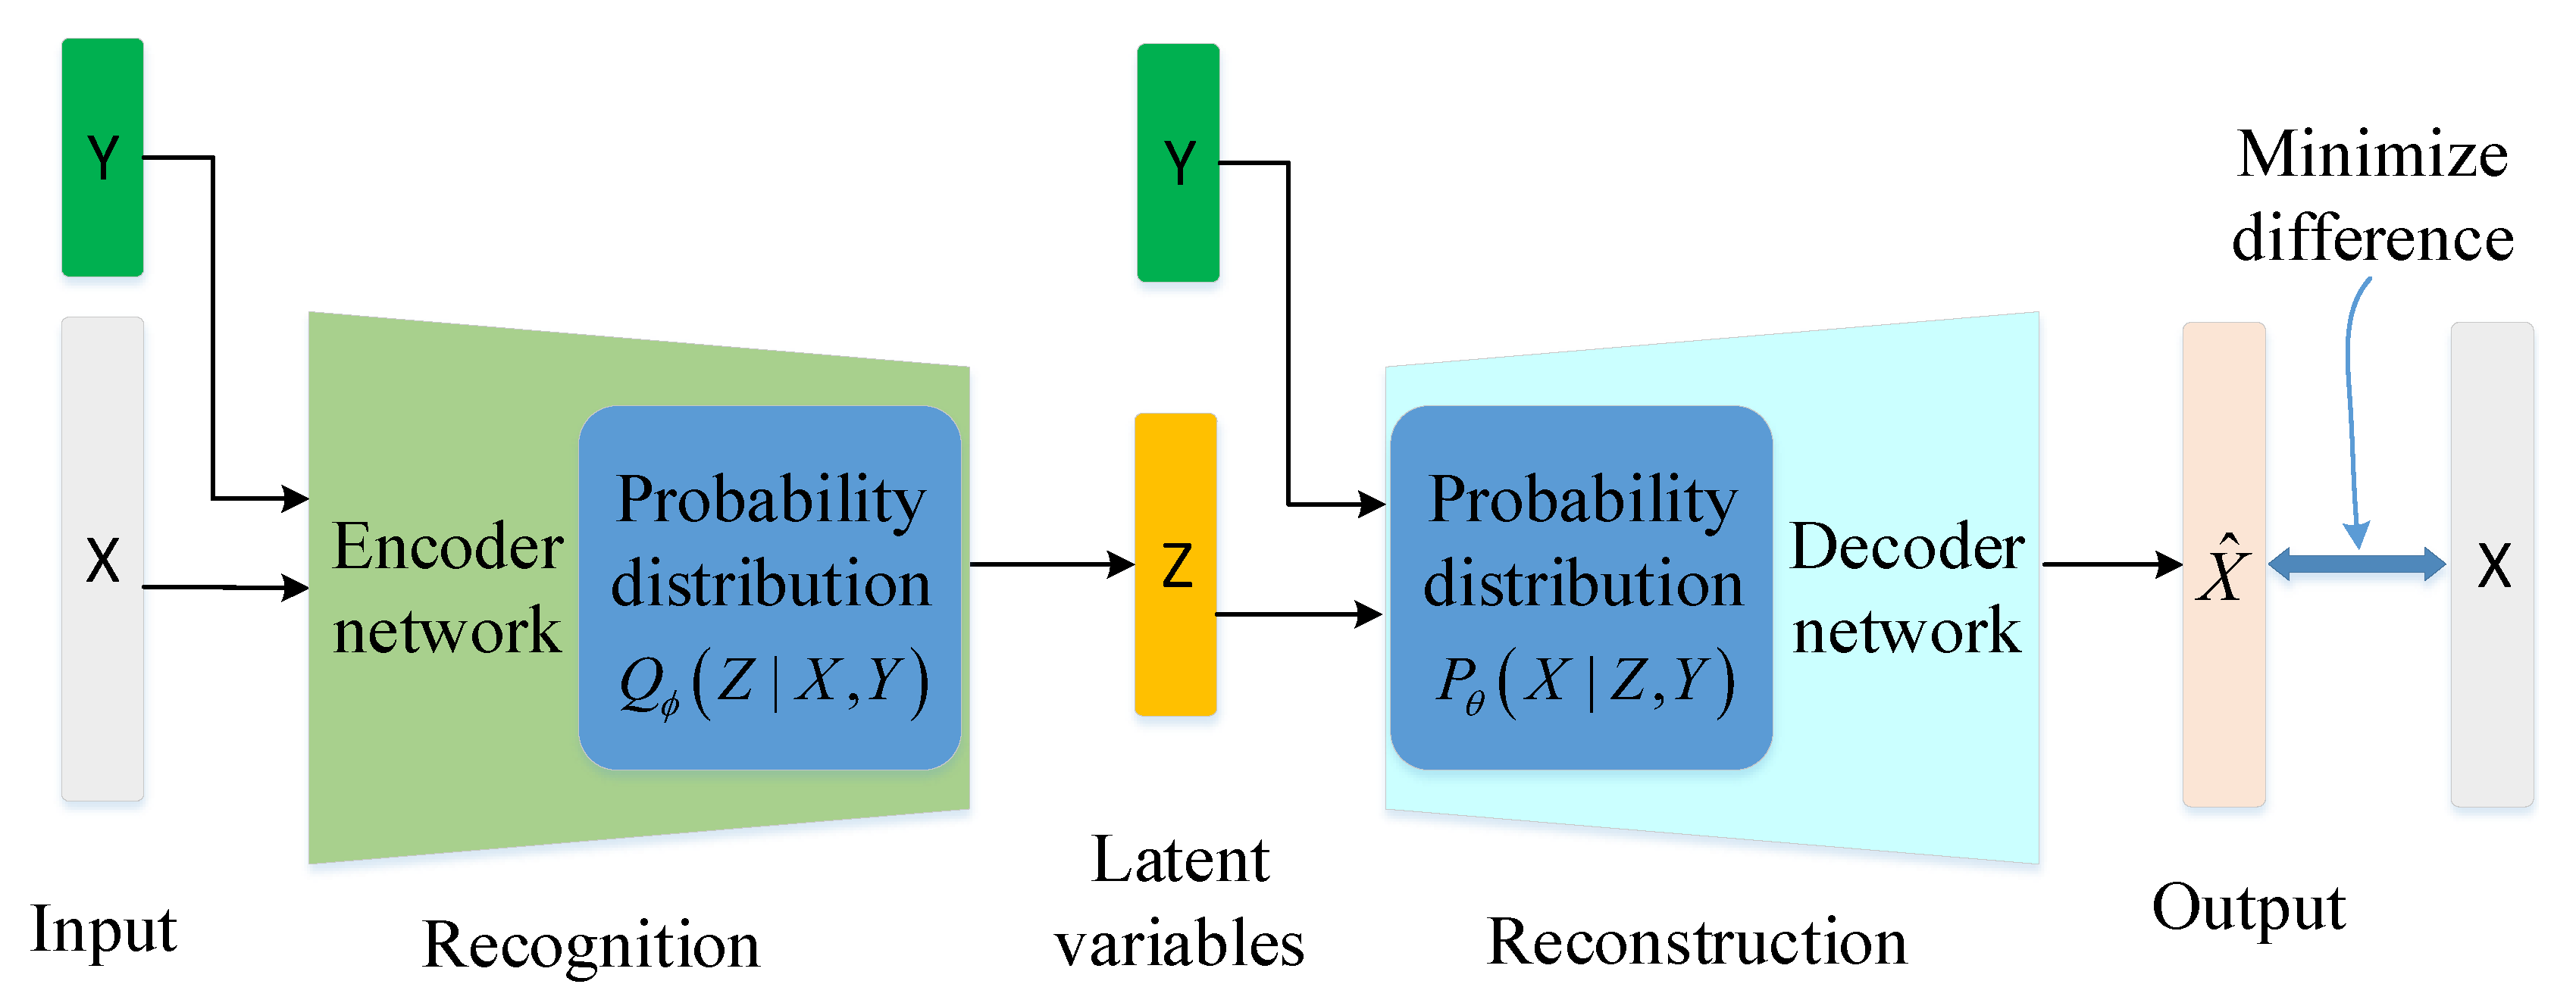

## Training surrogate model (ANN)

In [25]:
surrogate_model=training.training_surrogate_ANN(Training_sequences,properties_values_scaled)

  0%|          | 0/2000 [00:00<?, ?it/s]

epoch: 100, Loss:1.0100032091140747
epoch: 200, Loss:0.7786449790000916
epoch: 300, Loss:0.6768833994865417
epoch: 400, Loss:0.1522759646177292
epoch: 500, Loss:0.10683935880661011
epoch: 600, Loss:0.08389624208211899
epoch: 700, Loss:0.04994197189807892
epoch: 800, Loss:0.025272030383348465
epoch: 900, Loss:0.012795590795576572
epoch: 1000, Loss:0.003902813885360956
epoch: 1100, Loss:0.0015327776782214642
epoch: 1200, Loss:0.0011282506166025996
epoch: 1300, Loss:0.0010402260813862085
epoch: 1400, Loss:0.0010218523675575852
epoch: 1500, Loss:0.001014883629977703
epoch: 1600, Loss:0.0010096003534272313
epoch: 1700, Loss:0.0010042580543085933
epoch: 1800, Loss:0.001000578748062253
epoch: 1900, Loss:0.0009966720826923847
epoch: 2000, Loss:0.0009936961578205228
******Training ANN completed*****


## Training conditional autoencoder

In [26]:
cAE=training.training_cAE(Training_sequences,properties_values_scaled)

  0%|          | 0/1000 [00:00<?, ?it/s]

epoch: 100, Loss:0.004788057878613472
epoch: 200, Loss:0.0019735232926905155
epoch: 300, Loss:0.0011640458833426237
epoch: 400, Loss:0.0007814613054506481
epoch: 500, Loss:0.0005799785139970481
epoch: 600, Loss:0.0004630295734386891
epoch: 700, Loss:0.0003879193973261863
epoch: 800, Loss:0.000333331961883232
epoch: 900, Loss:0.0002886357542593032
epoch: 1000, Loss:0.0002526906901039183
*****Training cAE completed*****


# Plotting results

In [27]:
def store_fig(fig,name):
    fig.savefig('Sample_figure\{}.pdf'.format(name))
def store_fig_png(fig,name):
    fig.savefig('Sample_figure\{}.png'.format(name))


## Input scatter

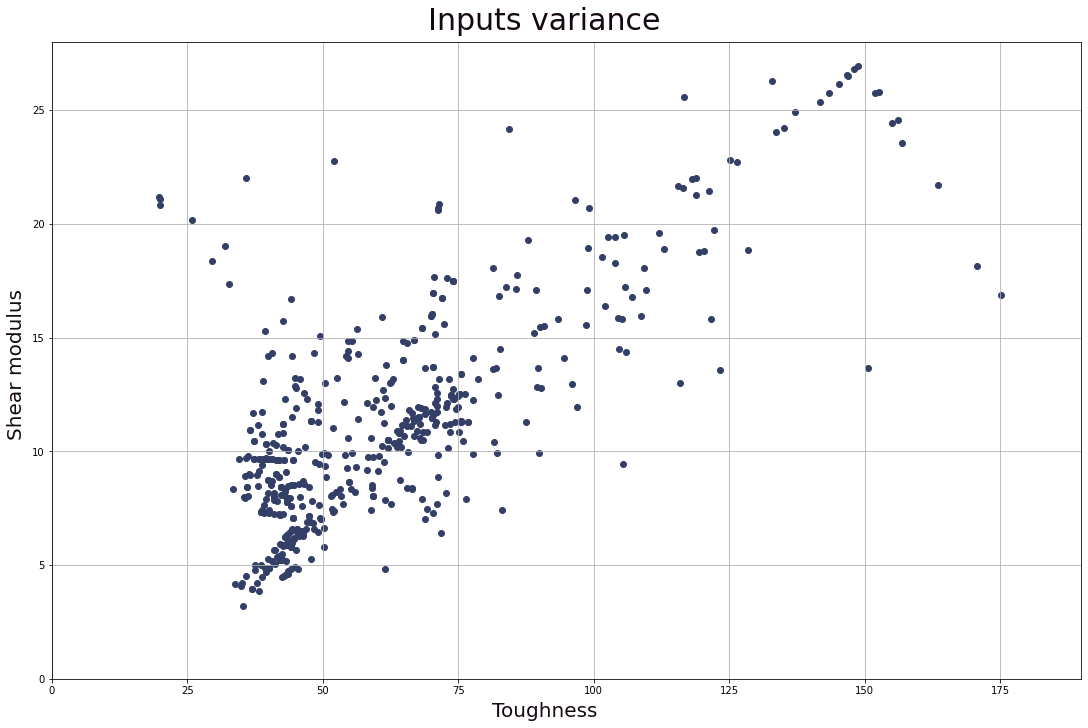

In [28]:
scatter_plot = plotting.input_scatter_plot(properties_values,savefig=False)

## Latent space exploration

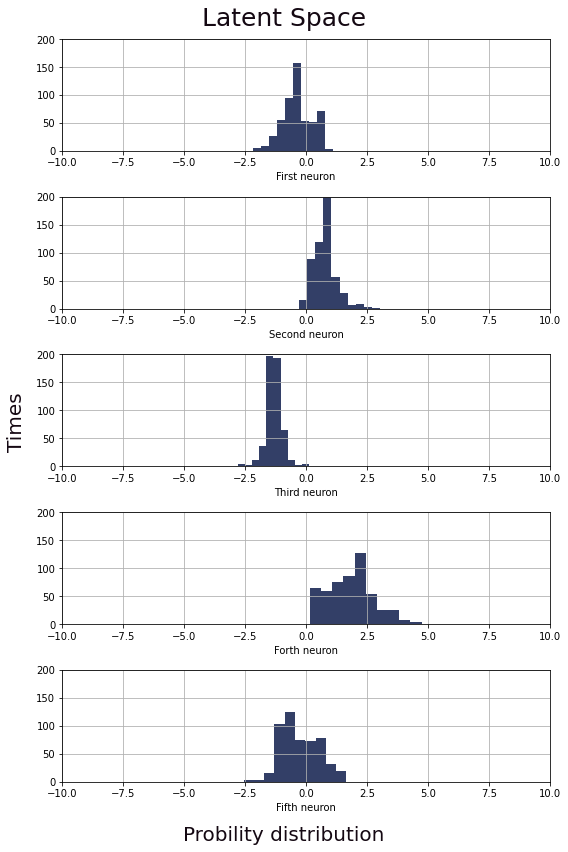

In [29]:
latent_min_Max_collection_cAE,latent_mean_std_collection_cAE,latent_code_cAE=vg.latent_code_inspector_cAE(cAE,Training_sequences,properties_values_scaled)
variance_plot_cAE=plotting.latent_code_variance(latent_code_cAE,savefig=False)

In [30]:
store_fig_png(variance_plot_cAE,"variance_plot_cAE")

## Mapping

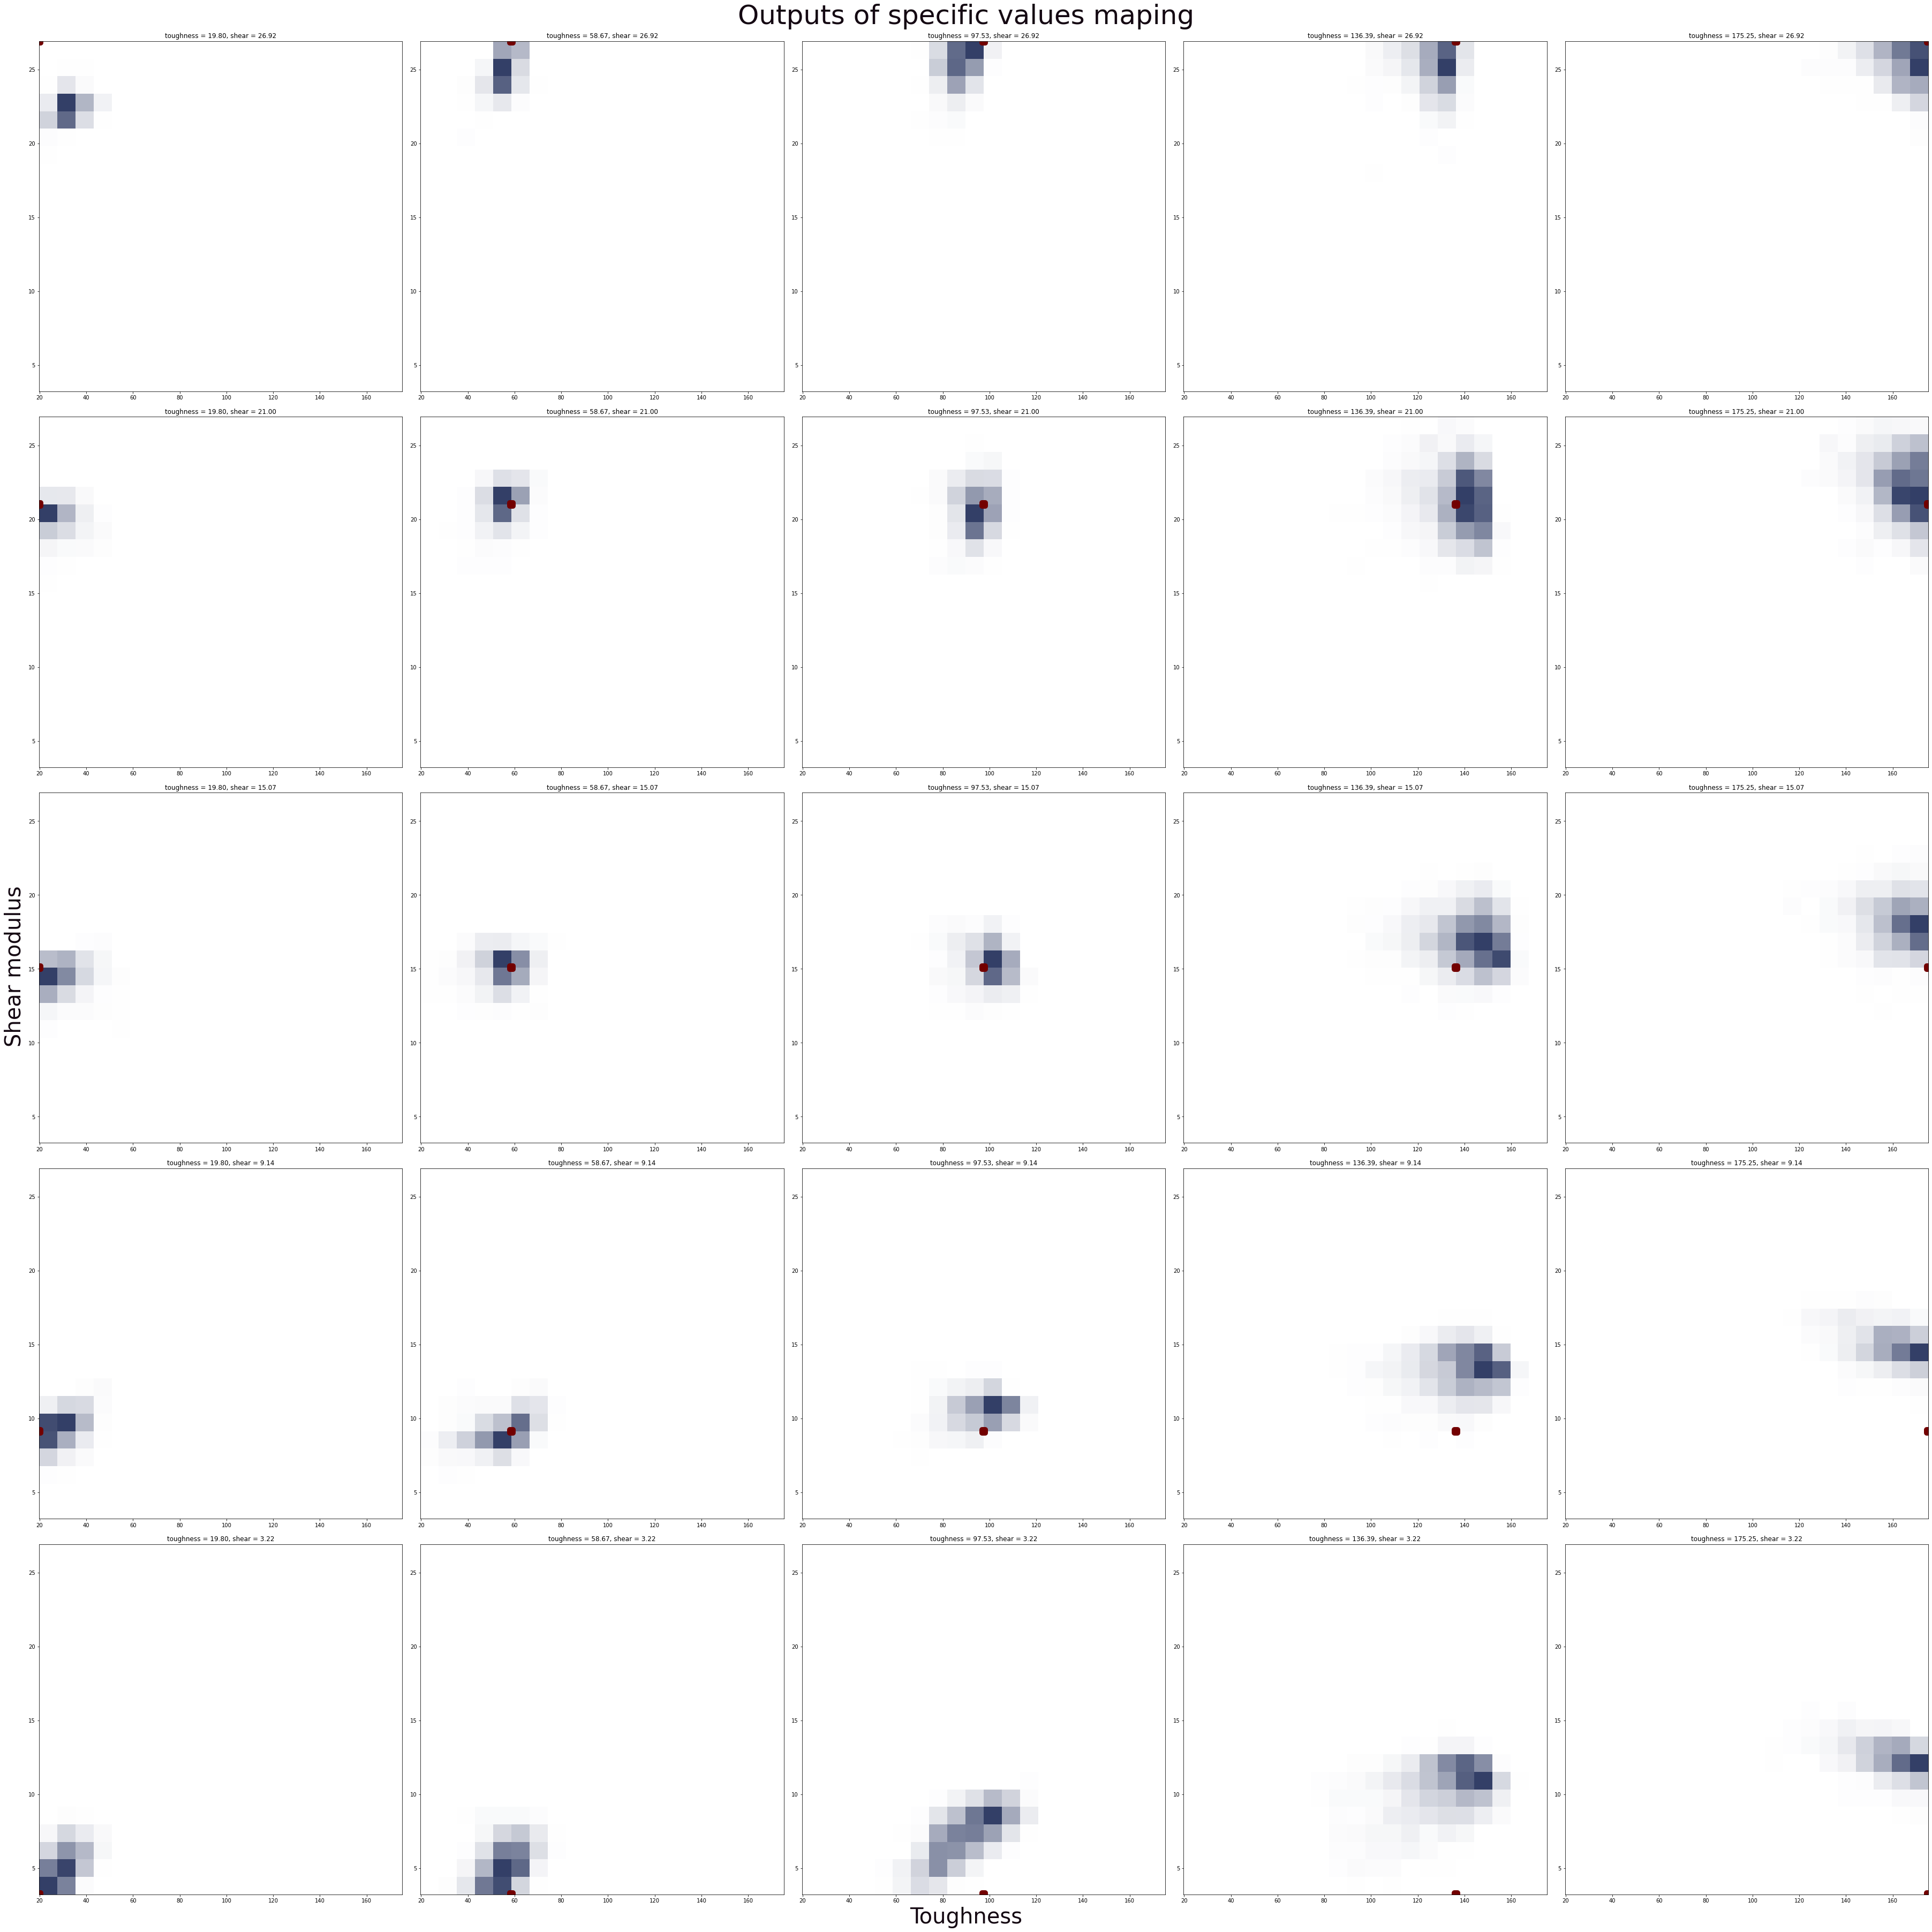

In [31]:
Mappingplot=plotting.output_variance_map(properties_values,latent_mean_std_collection_cAE,scaler,surrogate_model,cAE,savefig=False)

## Violint plots

In [32]:
preprocess_data = vg.preprocess_for_violinplot(properties_values=properties_values,Scaler=scaler,latent_mean_std=latent_mean_std_collection_cAE,over_value=[0,0])
violin_plot_cAE =plotting.violin_plot(surrogate_model=surrogate_model,model=cAE,Scaler=scaler,preprocess_data=preprocess_data,savefig=False)

# cVAE

In [33]:
cVAE=training.training_cVAE(Training_sequences,properties_values_scaled)

  0%|          | 0/1000 [00:00<?, ?it/s]

epoch: 100, Loss:0.05483977869153023
epoch: 200, Loss:0.017038986086845398
epoch: 300, Loss:0.010709799826145172
epoch: 400, Loss:0.008269552141427994
epoch: 500, Loss:0.007004899904131889
epoch: 600, Loss:0.00621812092140317
epoch: 700, Loss:0.005624035838991404
epoch: 800, Loss:0.005218103062361479
epoch: 900, Loss:0.004880023188889027
epoch: 1000, Loss:0.0045954822562634945
*****Training cAE completed*****


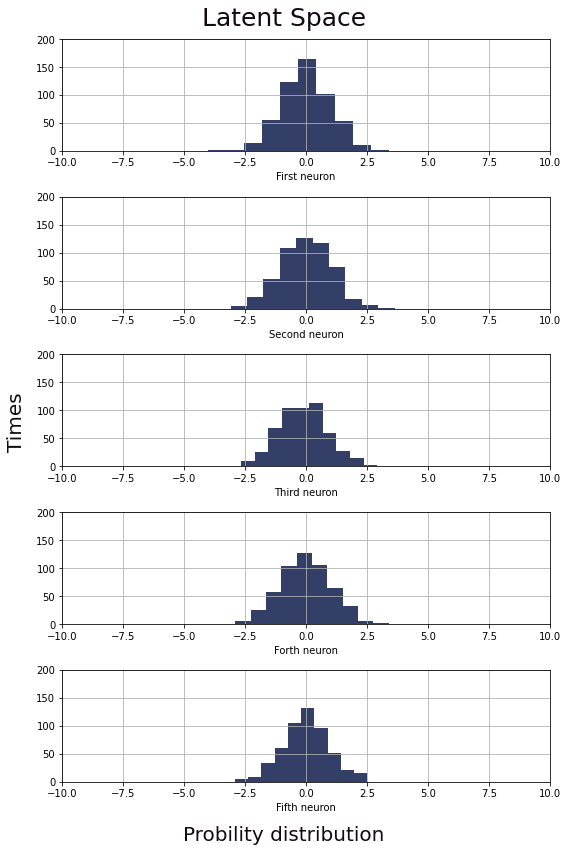

In [34]:
cVAE_min_Max_collection_cVAE,latent_mean_std_collection_cVAE,latent_code_cVAE=vg.latent_code_inspector_cVAE(cVAE,Training_sequences,properties_values_scaled)
variance_plot_cVAE=plotting.latent_code_variance(latent_code_cVAE,savefig=False)

In [35]:
store_fig_png(variance_plot_cVAE,"variance_plot_cVAE")

In [36]:
Mappingplot_cVAE=plotting.output_variance_map(properties_values,latent_mean_std_collection_cVAE,scaler,surrogate_model,cVAE,savefig=False)

In [37]:
store_fig_png(Mappingplot_cVAE,"Mappingplot_cVAE")
store_fig_png(Mappingplot,"Mappingplot_cAE")

In [38]:
preprocess_data_cVAE = vg.preprocess_for_violinplot(properties_values=properties_values,Scaler=scaler,latent_mean_std=latent_mean_std_collection_cVAE,over_value=[0,0])
violin_plot_cVAE = plotting.violin_plot(surrogate_model=surrogate_model,model=cVAE,Scaler=scaler,preprocess_data=preprocess_data_cVAE,savefig=False)

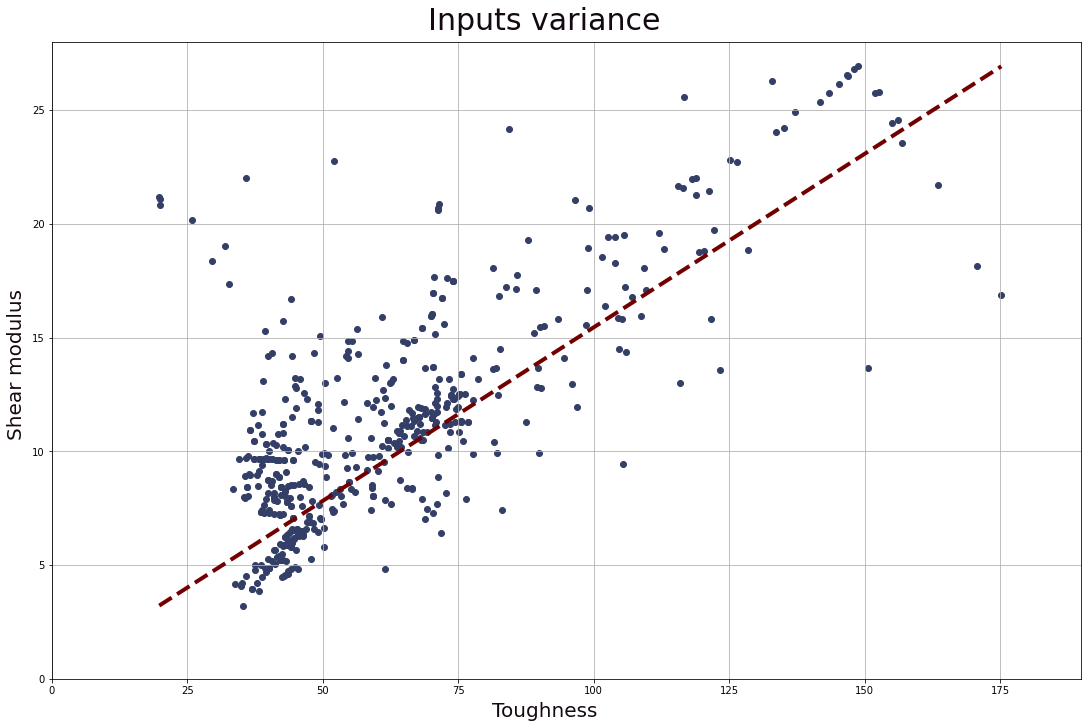

In [39]:
Slice_plot = plotting.input_scatter_plot_slice(properties_values,savefig=False)
store_fig_png(Slice_plot,"Slice_plot")

In [40]:
store_fig(Mappingplot,"Mapping_plot_cAE")
store_fig(Mappingplot_cVAE,"Mapping_plot_cVAE")
store_fig(violin_plot_cAE,"Violin_plot_cAE")
store_fig(violin_plot_cVAE,"Violin_plot_cVAE")
store_fig(Slice_plot,"Slice_plot")
store_fig(variance_plot_cAE,"Variance_plot_cAE")
store_fig(variance_plot_cVAE,"Variance_plot_cVAE")